# 04. CNN (Convolutional Neural Network)
---

본 내용은 [딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/book/2155) 을 바탕으로 공부하고 정리한 것임을 밝힙니다.

**목차**
> * CNN
  1. CNN의 필요성
  2. 채널(Channel)
* 합성곱 층 (Convolutional Layer)
  1. 커널(kernel)
  2. 스트라이드(stride)
  3. 패딩(Padding)
* 연산
  1. 가중치
  2. 편향(bias)
  3. 다수의 채널
* 풀링(Pooling)
  1. 맥스 풀링(Max Pooling)
  2. 평균 풀링(Average Pooling)
  3. 풀링 비교(Average Pooling)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

---
## CNN
---


합성곱 신경망 (CNN)은 대뇌의 시각 피질 연구에서 시작되었고 1980년대부터 이미지 인식 분야에 사용되었습니다. 최근 몇 년 동안 컴퓨터 성능의 향상과 많은 양의 훈련 데이터, 여러 옵티마이저의 성능 향상 덕분에 일부 이미지 처리문제 에서는 사람의 성능을 능가했습니다. 이 기술은 이미지 검색 서비스 등 여러 작업에도 많이 사용됩니다. 

이미지에 특화된 신경망 구조이며 학습파라미터의 갯수가 FC(Full-connected) 구조에 비해 매우 적어 다른 네트워크에 비해 효율적인 구조입니다. 

<p align='center'>
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/395px-Typical_cnn.png width=500>
</p>




### **(1) CNN의 탄생**
---

합성곱 신경망은 이미지 처리에 탁월한 성능을 보이는 신경망입니다. 이미지 처리를 하기 위해서 앞서 배운 다층 퍼셉트론을 사용할 수는 있지만 한계가 있었습니다. 

<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv0.png width=250>
</p>

이미지라는 것은 위와 같이 같은 대상이라도 휘어지거나, 이동되었거나, 방향이 뒤틀렸거나 등 다양한 변형이 존재합니다. 사람이 보기에는 두 그림 모두 알파벳 Y로 손쉽게 판단이 가능하지만, 기계가 보기에는 각 픽셀마다 가진 값이 대부분 상이하므로 사실상 다른 값을 가진 입력입니다. 


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv1.png width=550>
</p>

다층 퍼셉트론을 이용하기 위해서는 데이터 샘플 한개의 차원이 1차원이여야 합니다. 그러나 1차원으로 변환된 결과는 사람이 보기에도 이게 원래 어떤 이미지였는지 알아보기가 어렵습니다. 

위와 같은 결과는 변환 전에 가지고 있던 **공간적인 구조**(spatial structure) 정보가 유실된 상태입니다.

결국 이미지의 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법이 필요해졌고, 이를 위해 합성곱 신경망을 사용합니다.


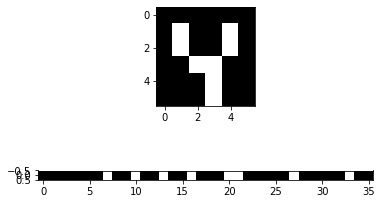

In [ ]:
X=np.array([
            [0,0,0,0,0,0],
            [0,1,0,0,1,0],
            [0,1,0,0,1,0],
            [0,0,1,1,0,0],
            [0,0,0,1,0,0],
            [0,0,0,1,0,0]
            ])
plt.subplot(2,1,1)
plt.imshow(X,cmap='gray')
plt.subplot(2,1,2)
plt.imshow(X.flatten().reshape(1,36),cmap='gray')
plt.show()

#224*224 = 50000개의 차원이 된다

### **(2) 채널(Channel)**
---

기계는 글자나 이미지보다 숫자. 다시 말해, 텐서를 더 잘 처리할 수 있습니다. 이미지는 **(높이, 너비, 채널)**이라는 **3차원 텐서**입니다. 

여기서 **높이**는 이미지의 세로 방향 픽셀 수, **너비**는 이미지의 가로 방향 픽셀 수, **채널**은 색 성분을 의미합니다. 

흑백 이미지는 채널 수가 1이며, 각 픽셀은 0부터 255 사이의 값을 가집니다. 아래는 28 × 28 픽셀의 손글씨 데이터를 보여줍니다.


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv2.png width=350>
</p>

흑백 이미지는 채널 수가 1이기 때문에 위 숫자 이미지 하나는 **(28 × 28 × 1)**의 크기를 가지는 3차원 텐서입니다. 

그렇다면 우리가 통상적으로 접하게 되는 컬러 이미지는 어떨까요? 컬러 이미지는 적색(Red), 녹색(Green), 청색(Blue)으로  채널 수가 **3**개입니다.


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv3.png width=300>
</p>

하나의 픽셀은 세 가지 색깔, 삼원색의 조합으로 이루어집니다. 만약, 높이가 28, 너비가 28인 컬러 이미지가 있다면 이 이미지의 텐서는 **(28 × 28 × 3)**의 크기를 가지는 3차원 텐서라고 할 수 있습니다.



* `jpeg` 이미지를 불러오세요

In [ ]:
img = plt.imread('cat1.jpg')

* 높이(Height), 너비(Width), 깊이/채널(Depth/Channel) 은?

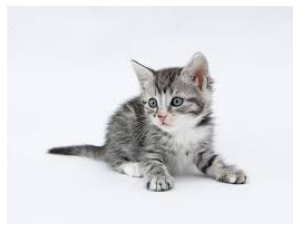

(196, 257, 3)


In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)
#높이 194
#너비 257
#채널 3

---
## 합성곱 층 (Convolutional Layer)
---


In [ ]:
from tensorflow.keras import models, layers, optimizers

### (1) **커널 (Kernel)**
---

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할을 합니다. 

합성곱 층에서 학습파라미터는 **커널**(kernel) 이 됩니다. 각 이미지 영역과 커널의 원소 값을 곱해서 모두 더한 값을 출력으로 합니다. 이미지의 가장 왼쪽 위부터 가장 오른쪽 아래까지 순차적으로 훑습니다.

위와 같이 합성곱 연산을 통해 나온 결과를 **특성 맵**(feature map)이라고 합니다.


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv4.png width=470>
</p>

* 출력값을 계산해 보세요

In [ ]:
#[[6,9,11]
# [10,4,4]
# [7,7,4]]

**텐서플로우 를 이용한 구현**

In [ ]:
X= layers.Input(shape=(5,5,1))
Y =layers.Conv2D(1,kernel_size=(3,3))(X)

model = models.Model(X,Y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


### **(2) 스트라이드 (stride)**
---

커널의 이동 범위를 **스트라이드**(stride) 라고 합니다. 위의 예제에서는 스트라이드가 1 이었지만 아래의 예제는 2일 경우를 보여줍니다.

<p align='center'>
<img src=https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile23.uf.tistory.com%2Fimage%2F99BF78385BC97FD82D7F7E
 width=500>
</p>

* 위 예제에서 스트라이드가 2일 때 출력값을 구하세요

**텐서플로우 를 이용한 구현**

In [ ]:
X= layers.Input(shape=(5,5,1))
Y =layers.Conv2D(1,kernel_size=3,strides=2)(X)  # 3, 2라 써도 자동으로 3,3   2,2로 인식

model = models.Model(X,Y)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


### **(3) 패딩 (Padding)**
---

위에서 스트라이드가 1일 경우에는 3 × 3의 특성 맵을 얻었고 2일 경우는 2 x 2의 특성맵을 얻었습니다. 

이와 같이 합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아집니다. 

합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 **패딩(padding)**을 사용합니다.

패딩은 지정된 개수의 폭만큼 테두리를 추가합니다. 이 때 테두리의 값을 0으로 채우는 것을 **제로 패딩**(zero padding)이라 하며 가장 흔하게 사용되는 패딩 방법입니다.

<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv10.png width=400>
</p>

**텐서플로우 를 이용한 구현**

In [ ]:
X= layers.Input(shape=(5,5,1))
Y =layers.Conv2D(1,kernel_size=3,padding='same')(X)  # 3, 2라 써도 자동으로 3,3   2,2로 인식

model = models.Model(X,Y)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


---
## 연산
---


### **(1) 가중치**
---

같은 크기의 이미지를 다층 퍼셉트론과 합성곱으로 각각 연산을 한다고 했을 때 아래와 같이 그림으로 나타낼 수 있습니다.

**다층 퍼셉트론**


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv11.png width=250>
</p>

**합성곱**


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv13.png width=450>
</p>


합성곱에서 사용되는 가중치는 4개 뿐입니다. 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것을 볼 수 있습니다.

결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 **적은 수의 가중치**를 사용하며 **공간적 구조 정보**를 보존한다는 특징이 있습니다.

### **(2) 편향(bias)**
---

합성곱 신경망에도 편향(bias)이 당연히 존재합니다. 편향은 커널을 적용한 뒤에 더해집니다. 편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해집니다.


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv14.png width=350>
</p>


**텐서플로우 를 이용한 구현**

In [ ]:
x = layers.Input(shape=(3,3,1))
y= layers.Conv2D(1,2)(x)
model = models.Model(x,y)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 3, 3, 1)]         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 1)           5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [ ]:
w,b = model.get_weights()
w.shape ,b.shape

((2, 2, 1, 1), (1,))

### **(3) 다수의 채널**
---

지금까지는 채널(channel) 또는 깊이(depth)를 고려하지 않고 설명했습니다. 

만약, 다수의 채널을 가진 입력 데이터에 대해 합성곱 연산을 하면 입력 데이터의 채널 수와 커널의 채널 수는 같아야 합니다.

합성곱 연산은 채널마다 수행되며 연산 결과를 모두 더하여 최종 특성 맵을 얻습니다.


<p align='center'>
<img src=https://wikidocs.net/images/page/64066/conv15.png width=500>
</p>


**텐서플로우 를 이용한 구현**

In [ ]:
x= layers.Input(shape=(3,3,3))
y = layers.Conv2D(1,kernel_size=2)(x)
model = models.Model(x,y)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 3, 3, 3)]         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 2, 1)           13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [ ]:
W, b = model.get_weights()
W.shape,b.shape

((2, 2, 3, 1), (1,))

---
## 풀링(Pooling)
---
**풀링**(Pooling) 연산은 커널과 스트라이드 개념이 존재한다는 점에서 합성곱 연산과 유사하지만, 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않습니다.

일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적입니다. 


### **(1) 맥스 풀링(Max Pooling)**
---

**맥스풀링**은 이미지 영역의 최대값 만을 출력값으로 가지는 연산 방법입니다. 

아래는 스트라이드가 2이고  2 × 2 크기 커널로 맥스 풀링 연산을 했을 때 그림입니다. 



<p align='center'>
<img src=https://wikidocs.net/images/page/64066/maxpooling.PNG width=400>
</p>



In [ ]:
X = np.array([[5,2,3,4],
              [2,1,0,1],
              [3,7,9,5],
              [1,4,1,8]])
X.shape

(4, 4)

**텐서플로우 를 이용한 구현**

In [ ]:
x= layers.Input(shape=(4,4,1))
y= layers.MaxPool2D(pool_size=(2,2))(x)
model = models.Model(x,y)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 4, 4, 1)]         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 1)          0         
 )                                                               
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# X->(개수 , 가로,세로,채널)
X=np.reshape(X,(1,4,4,1))
Y = model.predict(X)
print(Y)

[[[[5.]
   [4.]]

  [[7.]
   [9.]]]]


### (2) 평균 풀링(Average Pooling)
---

**평균풀링**은 이미지 영역의 평균값 을 출력값으로 가지는 연산 방법입니다. 

위의 예제에서 평균 풀링한 결과를 연산해 봅니다.



**텐서플로우 를 이용한 구현**

In [ ]:
x= layers.Input(shape=(4,4,1))
y= layers.AveragePooling2D(pool_size=(2,2))(x)
model = models.Model(x,y)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 4, 4, 1)]         0         
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 1)          0         
 ooling2D)                                                       
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# X->(개수 , 가로,세로,채널)
Y = model.predict(X)
print(Y)

[[[[2.5 ]
   [2.  ]]

  [[3.75]
   [5.75]]]]


### (3) 풀링 비교(Average Pooling)
---



<p align='center'>
<img src=https://miro.medium.com/max/2400/1*HinFZ5XQKP_Lc2YY0Esh6A.png  width=650>
</p>